In [1]:
import pandas as pd

In [2]:
import json
def read_json(path):
  with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)
  return data

In [3]:
path_lst = [
    '/home/user01/experiments/reports/',
]

In [4]:
exp_prefix = '106-svm-backdoor-idea1-mixup-0.5-cifar(0-6)'

In [5]:
import os

all_files = []
for folder in path_lst:
  files_inside_folder = os.listdir(folder)
  desired_files = [folder+item for item in files_inside_folder if item.startswith(exp_prefix)]
  all_files.extend(desired_files)

for file in all_files:
    print(file)

/home/user01/experiments/reports/106-svm-backdoor-idea1-mixup-0.5-cifar(0-6)-80-modify.json
/home/user01/experiments/reports/106-svm-backdoor-idea1-mixup-0.5-cifar(0-6)-40-modify.json
/home/user01/experiments/reports/106-svm-backdoor-idea1-mixup-0.5-cifar(0-6)-60-modify.json
/home/user01/experiments/reports/106-svm-backdoor-idea1-mixup-0.5-cifar(0-6)-20-modify.json
/home/user01/experiments/reports/106-svm-backdoor-idea1-mixup-0.5-cifar(0-6)-0-modify.json


In [6]:
contents = [read_json(file_path) for file_path in all_files]

In [7]:
def extract_info(json_dict):
  log = json_dict['log']
  base = json_dict
  return {
      'poisoning_rate':base['poisoning_rate']*100,
      'attack_success_rate_bd':log['attack_success_rate_test_before_defense']*100,
      'attack_success_rate_ad':log['attack_success_rate_test']*100,
      'benign_accuracy_bd':log['accuracy_Test_before_defense']*100,
      'benign_accuracy_ad':log['accuracy_Test']*100,
#       'asr_bd':log['attack_success_rate_before_defense']*100,
#       'asr':log['attack_success_rate']*100,
#       'asr_test_bd':log['attack_success_rate_test_before_defense']*100,
#       'asr_test':log['attack_success_rate_test']*100,
#       'acc_train_bd':log['accuracy_Train_before_defense']*100,
#       'acc_train':log['accuracy_Train']*100,
#       'acc_test_bd':log['accuracy_Test_before_defense']*100,
#       'acc_test':log['accuracy_Test']*100,
#       'ba_bd':log['benign_accuracy_before_defense']*100,
#       'ba':log['benign_accuracy']*100,
#       'defense_true_positive':log['defense_true_positive']*100,
#       'defense_poison_removal':log['defense_poison_removal']*100
  }

In [8]:
contents = [extract_info(item) for item in contents]

In [9]:
import pandas as pd
df = pd.DataFrame(contents).sort_values('poisoning_rate')
df.head(11)

,poisoning_rate,attack_success_rate_bd,attack_success_rate_ad,benign_accuracy_bd,benign_accuracy_ad
4,0.0,54.5,54.5,85.90,81.00
3,20.0,100.0,50.0,78.90,87.25
1,40.0,100.0,44.5,86.15,72.30
2,60.0,100.0,43.0,74.00,80.65
0,80.0,100.0,50.0,81.20,78.35


In [10]:
df.columns = ['poisoning rate','attack success rate (bd)','attack success rate (ad)','benign accuracy (bd)','benign accuracy (ad)']

In [11]:
df = df.loc[df['poisoning rate'].isin({0,20,40,60,80,100})]

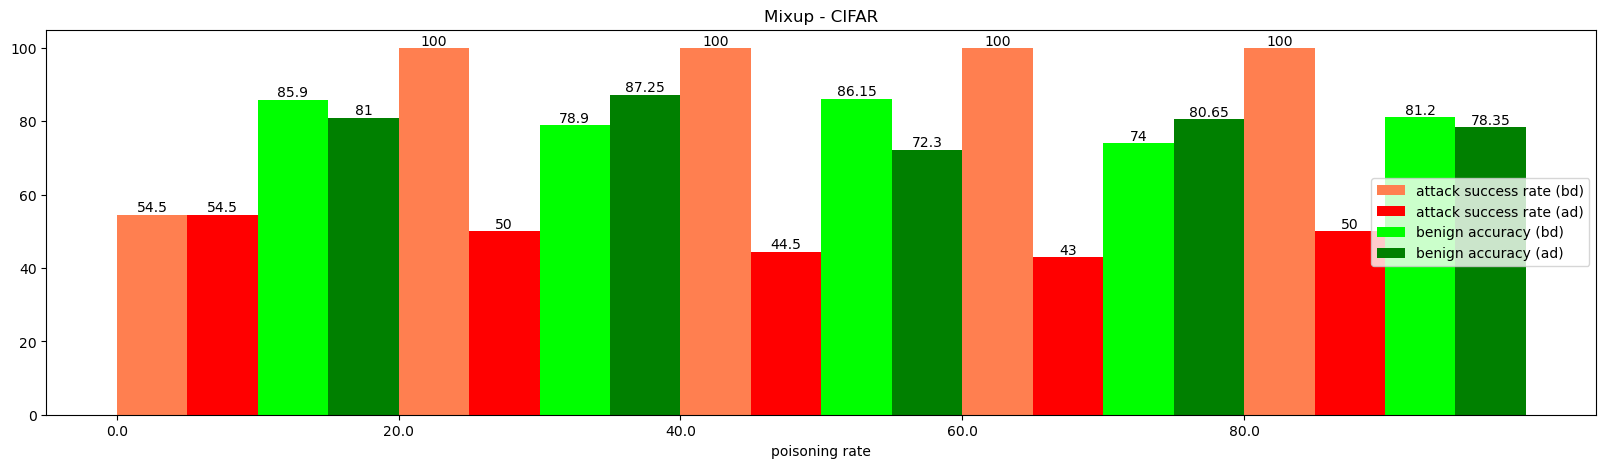

In [12]:
import matplotlib.pyplot as plt
title='Mixup - CIFAR'
plt.rcParams["figure.figsize"] = [20, 5]
ax = df.plot(kind='bar', x='poisoning rate', y=['attack success rate (bd)','attack success rate (ad)','benign accuracy (bd)','benign accuracy (ad)'],
                 title=title, color=['coral','red','lime','green'],width=1.0, align='edge') # ,'lightblue','blue','lavender','purple','yellow','gold'
for container in ax.containers:
    ax.bar_label(container)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
plt.legend(loc = 5)
#plt.set_xticks([0,20,40,60,80,100],['RATE: 0','RATE: 0','RATE: 0','RATE: 0','RATE: 0','RATE: 0'])
#plt.savefig(root_path+'experiments/Visualize/'+exp_id+'/'+title+'.jpg', dpi=300)